# <span style="color:blue"> Esercitazione 1</span>


## <span style="color:black">  Esercizio 01.1</span>
In this exercise i test the provided Pseudo-Random Number generator by evaluating:
1.  $\langle r \rangle = \int_0^1 r dr = 1/2$
2.  $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$
3.  $\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$

all using the data blocking method, with a number of throws M = $10^5$ and number of blocks N = $10^2$.

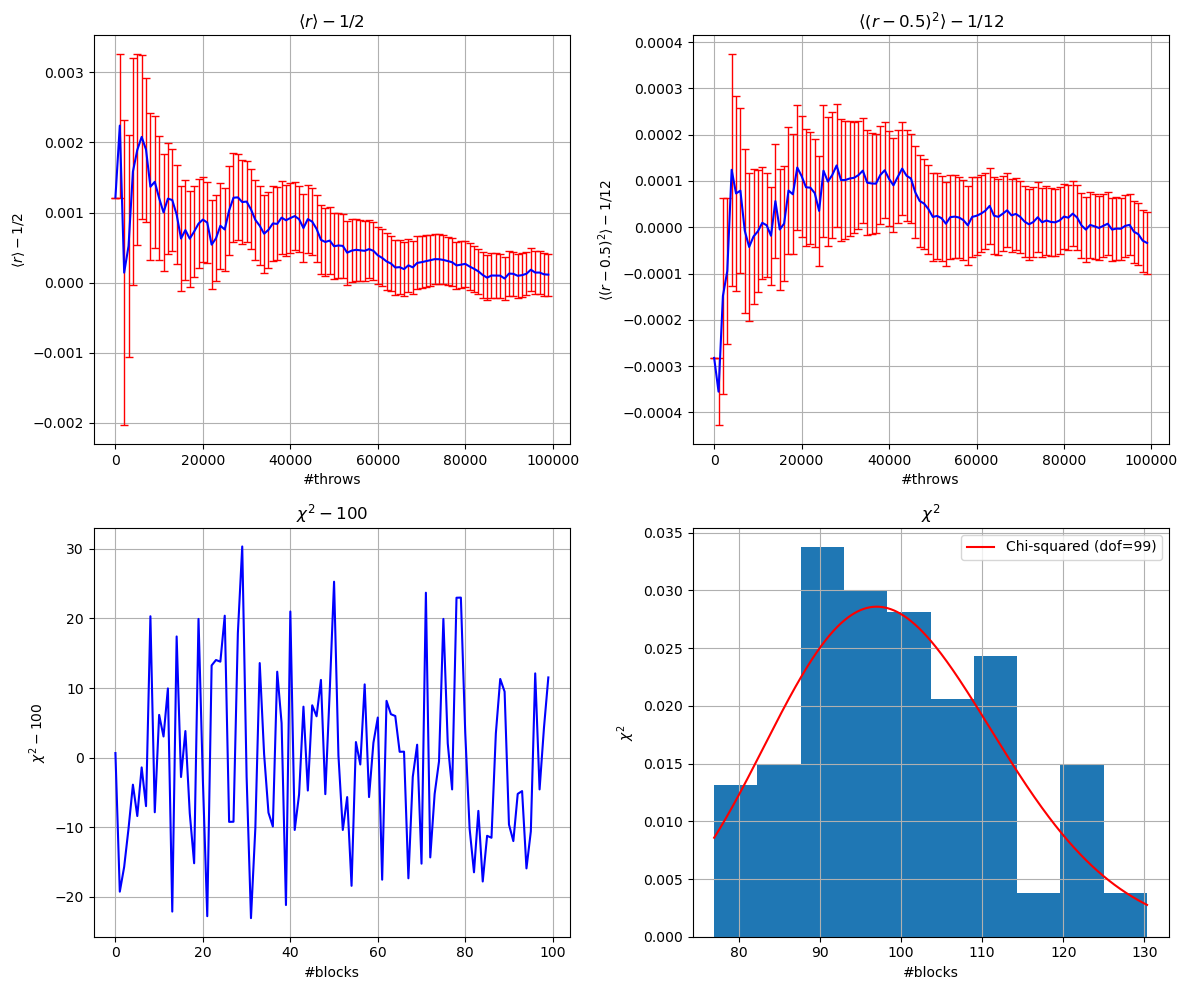

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

N = 100
x = np.arange(100)
media = np.loadtxt("media.dat")
errore = np.loadtxt("errore.dat")
var = np.loadtxt("var.dat")
errorevar = np.loadtxt("errorevar.dat")
chi = np.loadtxt("chi2.dat")

x *= 1000

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].errorbar(x, media - 0.5, yerr=errore, color='b', ecolor='r', elinewidth=1, capsize=3)
axs[0, 0].set_title(r'$\langle r \rangle - 1/2$')
axs[0, 0].set_xlabel('#throws')
axs[0, 0].set_ylabel(r'$\langle r \rangle - 1/2$')
axs[0, 0].grid(True)

axs[0, 1].errorbar(x, var - 1/12, yerr=errorevar, color='b', ecolor='r', elinewidth=1, capsize=3)
axs[0, 1].set_title(r'$\langle (r - 0.5)^2 \rangle - 1/12$')
axs[0, 1].set_xlabel('#throws')
axs[0, 1].set_ylabel(r'$\langle (r - 0.5)^2 \rangle - 1/12$')
axs[0, 1].grid(True)

axs[1, 0].plot(chi - 100, color='b')
axs[1, 0].set_title(r'$\chi^2 - 100$')
axs[1, 0].set_xlabel('#blocks')
axs[1, 0].set_ylabel(r'$\chi^2 - 100$')
axs[1, 0].grid(True)

counts, bins,_ = axs[1, 1].hist(chi, bins=10, density=True)
axs[1, 1].set_title(r'$\chi^2$')
axs[1, 1].set_xlabel('#blocks')
axs[1, 1].set_ylabel(r'$\chi^2$')
axs[1, 1].grid(True)

x_fit = np.linspace(bins[0], bins[-1], 1000)
y_fit = chi2.pdf(x_fit, 99)
axs[1, 1].plot(x_fit, y_fit, 'r-', label=f'Chi-squared (dof={99})')
axs[1, 1].legend()
axs[1, 1].grid(True)


plt.tight_layout()

plt.show()


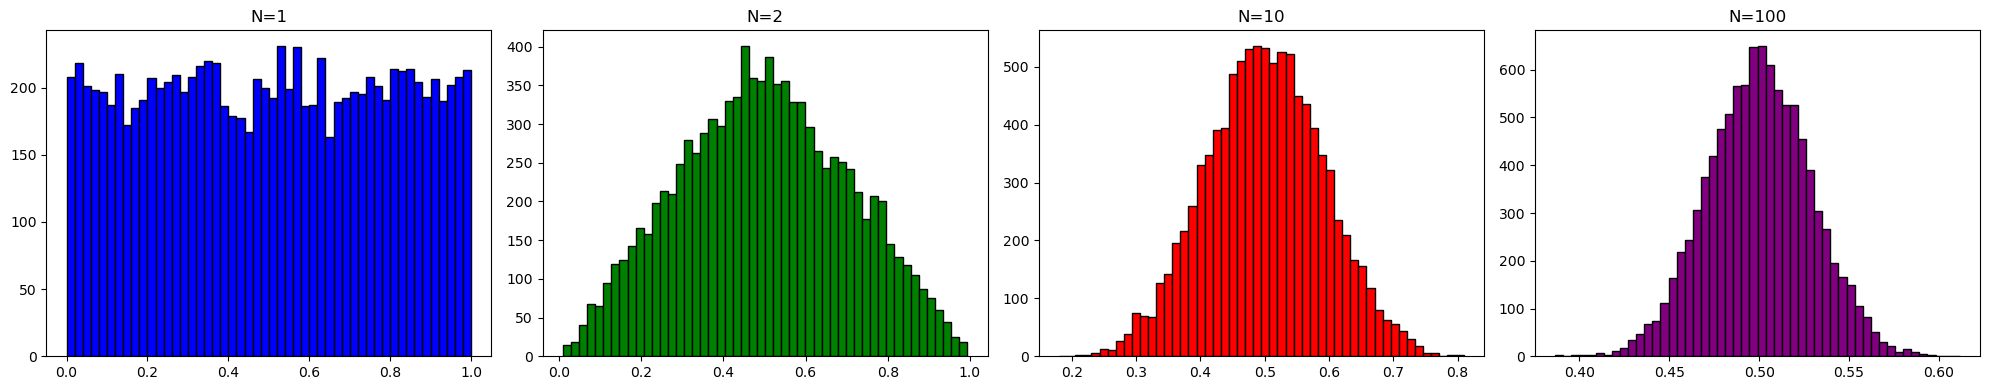

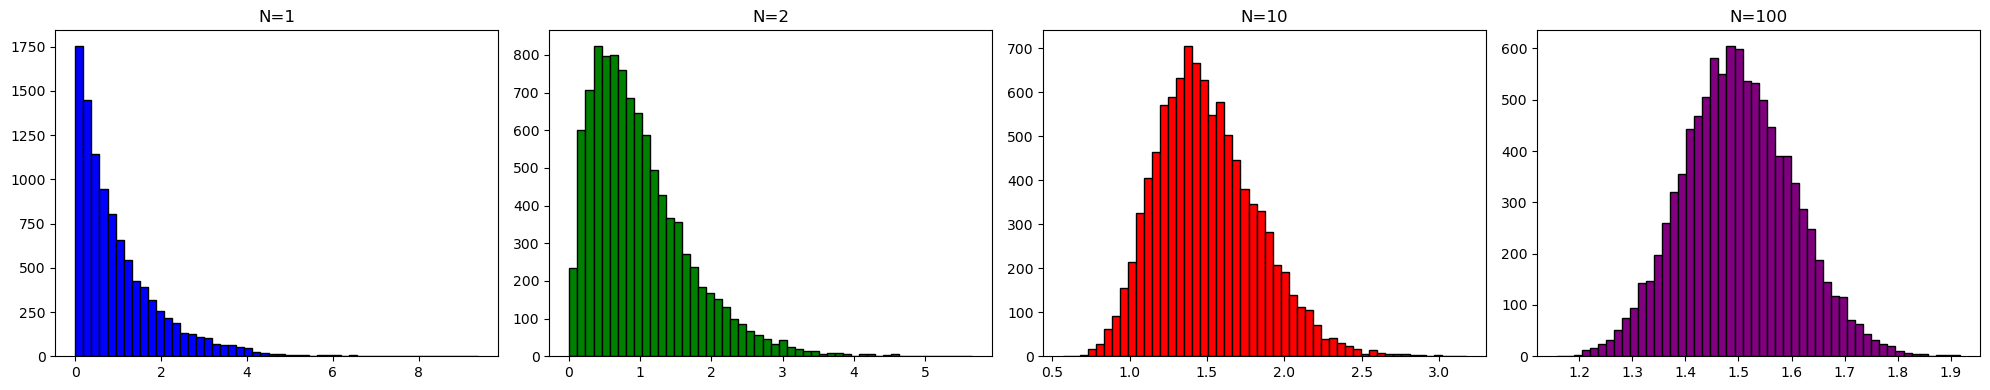

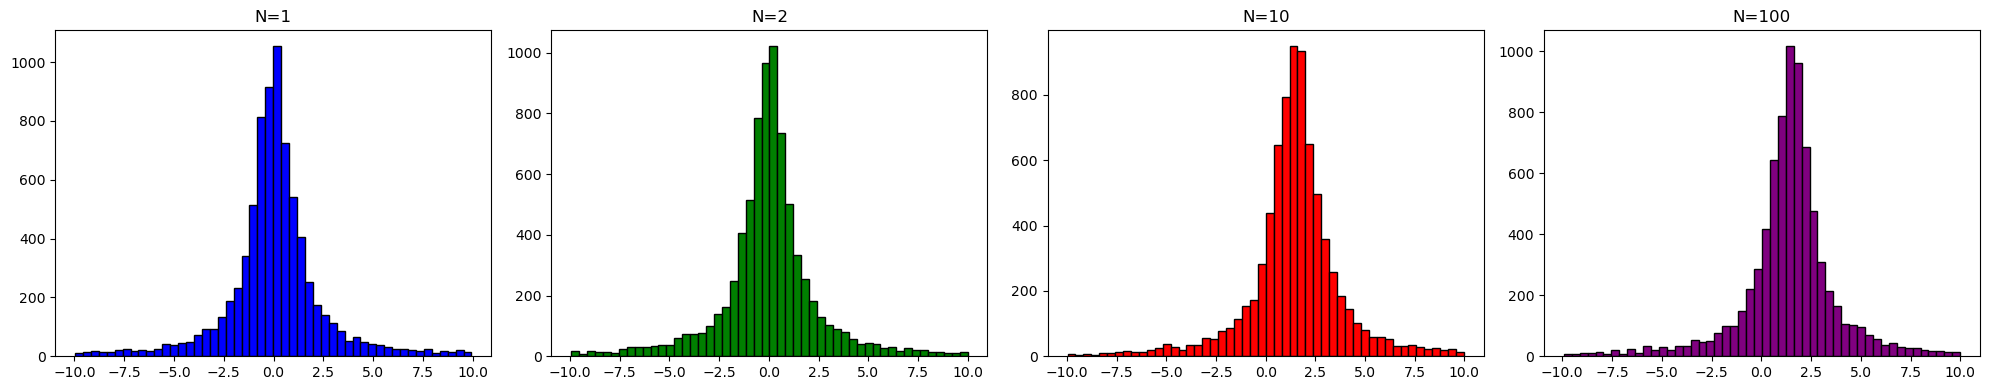

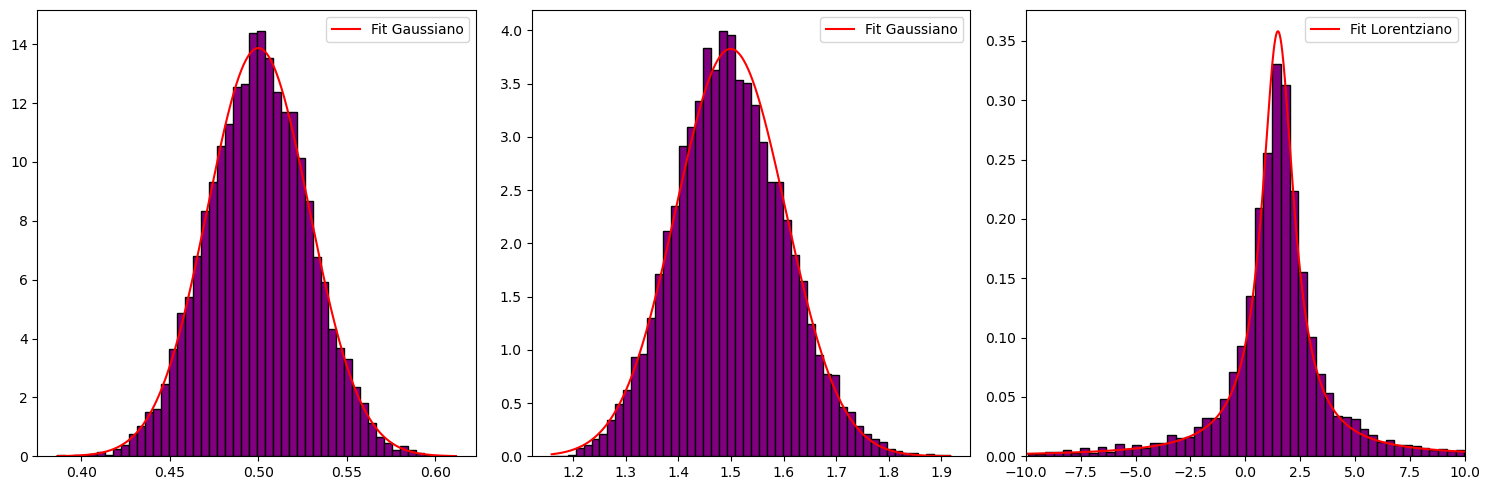

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm
from scipy.stats import cauchy

# Caricamento dei dati
lin = np.genfromtxt("lin.dat", delimiter=',')
exp = np.genfromtxt("exp.dat", delimiter=',')
lorentz = np.genfromtxt("lorentz.dat", delimiter=',')

mask = np.all((lorentz >= -10) & (lorentz <= 10), axis=1)
lorentz1 = lorentz[mask]

colonne = [
    lin[:, 0], lin[:, 1], lin[:, 2], lin[:, 3],
    exp[:, 0], exp[:, 1], exp[:, 2], exp[:, 3],
    lorentz1[:, 0], lorentz1[:, 1], lorentz1[:, 2], lorentz1[:, 3]
]

titoli = ['N=1', 'N=2', 'N=10', 'N=100']

def plot_histograms(colonne, titoli, figsize=(20, 4)):
    fig, axs = plt.subplots(1, 4, figsize=figsize)
    for i in range(4):
        axs[i].hist(colonne[i], bins=50, color=['blue', 'green', 'red', 'purple'][i], edgecolor='black')
        axs[i].set_title(titoli[i])
    plt.tight_layout()
    plt.show()

# Plot degli istogrammi per i vari set di dati
for i in range(0, len(colonne), 4):
    plot_histograms(colonne[i:i+4], titoli)

# Fit dei dati
mu_s, sigma_s = norm.fit(lin[:, 3])  
mu_e, sigma_e = norm.fit(exp[:, 3])  
av_fit, gamma_fit = cauchy.fit(lorentz1[:, 3])  

# Intervallo per il fit
x_fit = np.linspace(min(lin[:, 3]), max(lin[:, 3]), 1000)
z_fit = np.linspace(min(exp[:, 3]), max(exp[:, 3]), 1000)
w_fit = np.linspace(-10, 10, 1000)  # Limita l'intervallo per il fit Lorentziano

# Creazione dei grafici
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Istogramma e fit Gaussiano per il primo set di dati
axs[0].hist(lin[:, 3], bins=50, color='purple', edgecolor='black', density=True)
axs[0].plot(x_fit, norm.pdf(x_fit, mu_s, sigma_s), 'r-', label="Fit Gaussiano")
axs[0].legend()

# Istogramma e fit Gaussiano per il secondo set di dati
axs[1].hist(exp[:, 3], bins=50, color='purple', edgecolor='black', density=True)
axs[1].plot(z_fit, norm.pdf(z_fit, mu_e, sigma_e), 'r-', label="Fit Gaussiano")
axs[1].legend()

# Istogramma e fit Lorentziano per il terzo set di dati (con limitazione dell'intervallo)
axs[2].hist(lorentz1[:, 3], bins=50, color='purple', edgecolor='black', density=True)
axs[2].plot(w_fit, cauchy.pdf(w_fit, loc=av_fit, scale=gamma_fit), label="Fit Lorentziano", color="red")
axs[2].set_xlim(-10, 10)  # Limita l'asse x per evitare le code estreme
axs[2].legend()

# Visualizzazione dei grafici
plt.tight_layout()
plt.show()



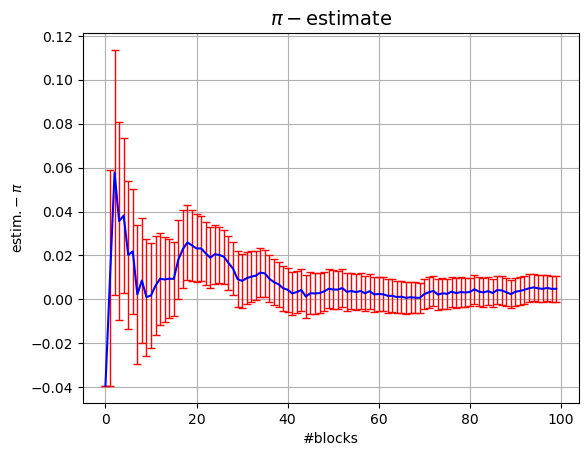

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(100)
pi, error = np.genfromtxt("01.3/pi.dat", usecols=(0,1), delimiter='\t', unpack='true')

plt.errorbar(x, pi - np.pi, yerr=error, color='b', ecolor='r', elinewidth=1, capsize=3)
plt.xlabel('#blocks')
plt.ylabel(r'$\text{estim.} - \pi$')
plt.title(r'$\pi-\text{estimate}$', fontsize=14)
plt.grid(True)

plt.show()
